In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
#dummy change
df = pd.read_csv("liar_processed.csv")
df.head()


,statement,label
0,Says the Annies List political group supports ...,fake
1,When did the decline of coal start? It started...,real
2,"Hillary Clinton agrees with John McCain ""by vo...",real
3,Health care reform legislation is likely to ma...,fake
4,The economic turnaround started at the end of ...,real


In [9]:
real_text = " ".join(df[df['label'] == 'real']['statement'].astype(str))
fake_text = " ".join(df[df['label'] == 'fake']['statement'].astype(str))

In [11]:
wordcloud_real = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Greens'  # greenish color tone for real news
).generate(real_text)

wordcloud_fake = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Reds'  # reddish tone for fake news
).generate(fake_text)

(-0.5, 799.5, 399.5, -0.5)

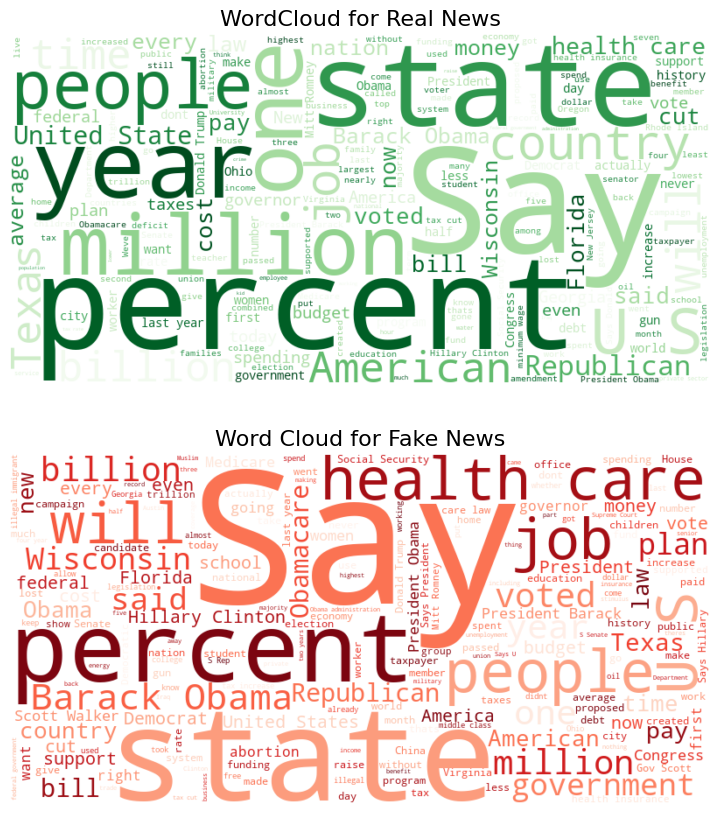

In [13]:
fig, axs = plt.subplots(2,1, figsize = (12,10))
axs[0].imshow( wordcloud_real, interpolation = 'bilinear')
axs[0].set_title("WordCloud for Real News", fontsize = 16)
axs[0].axis('off')
axs[1].imshow(wordcloud_fake, interpolation='bilinear')
axs[1].set_title("Word Cloud for Fake News", fontsize=16)
axs[1].axis('off')


In [14]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

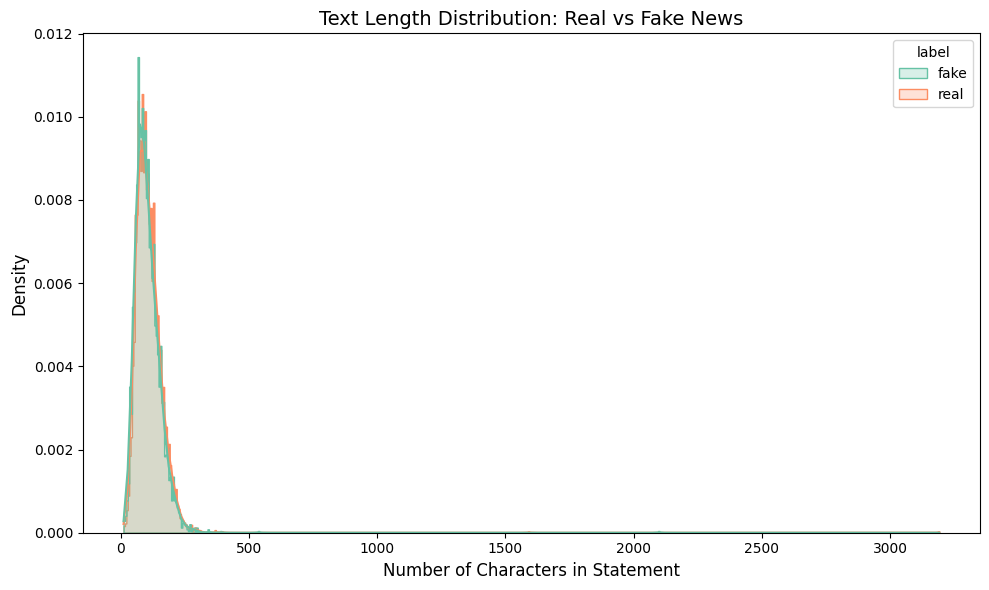

In [18]:
import seaborn as sns
df['text_length']= df['statement'].astype(str).apply(len)
plt.figure(figsize = (10,6))
sns.histplot(data=df,
             x='text_length',
             hue='label',
             kde=True,
             element = 'step',
             stat='density',
             common_norm=False,
             palette='Set2')
plt.title("Text Length Distribution: Real vs Fake News", fontsize=14)
plt.xlabel("Number of Characters in Statement", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.tight_layout()
plt.show()
